<a href="https://colab.research.google.com/github/goswamiaman172/Credit-Card-Lead-Prediction/blob/main/Final_model_Job_A_thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Lead Prediction**


Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

 **Import Modules from Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter DataScience/Job A thon/data/train_s3TEQDk.csv')

In [ ]:
df.shape

(245725, 11)

**Preprocessing the data**

In [ ]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
df.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# statistical info
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# **Data Inspecting and Cleaning**

**Checking Null values**

In [ ]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
df['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

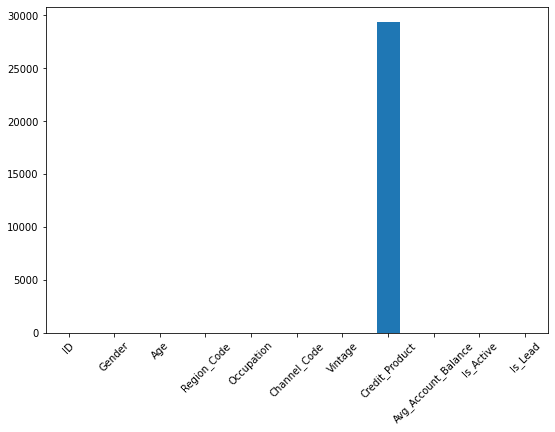

In [ ]:
#Checking for null values present in Data
df.isnull().sum().plot(figsize=(9,6),kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.duplicated().sum()

0

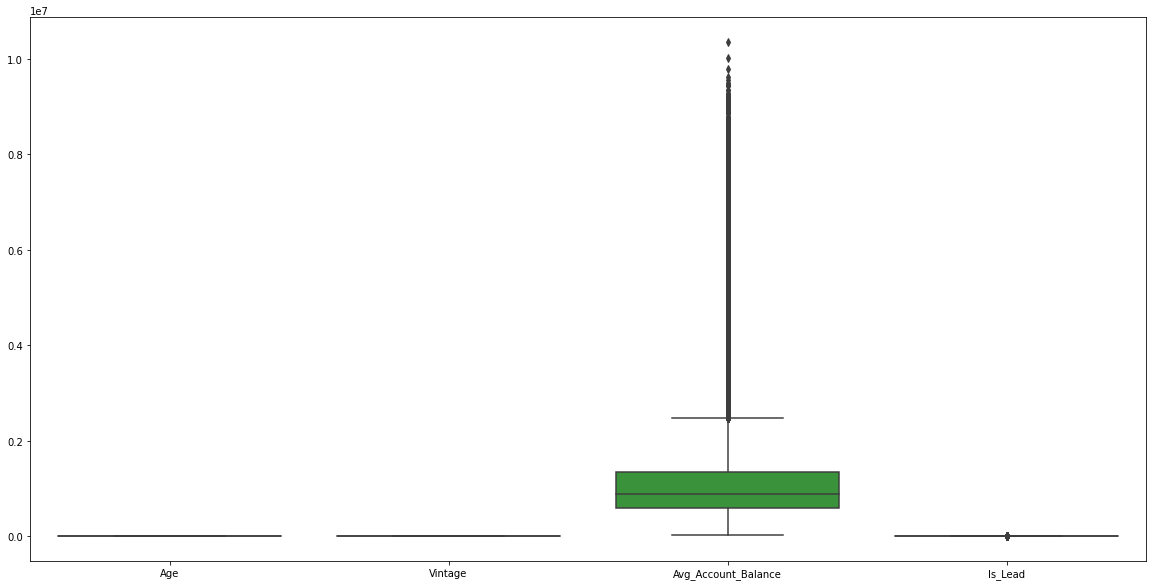

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

# **Exploratory Data Analysis**

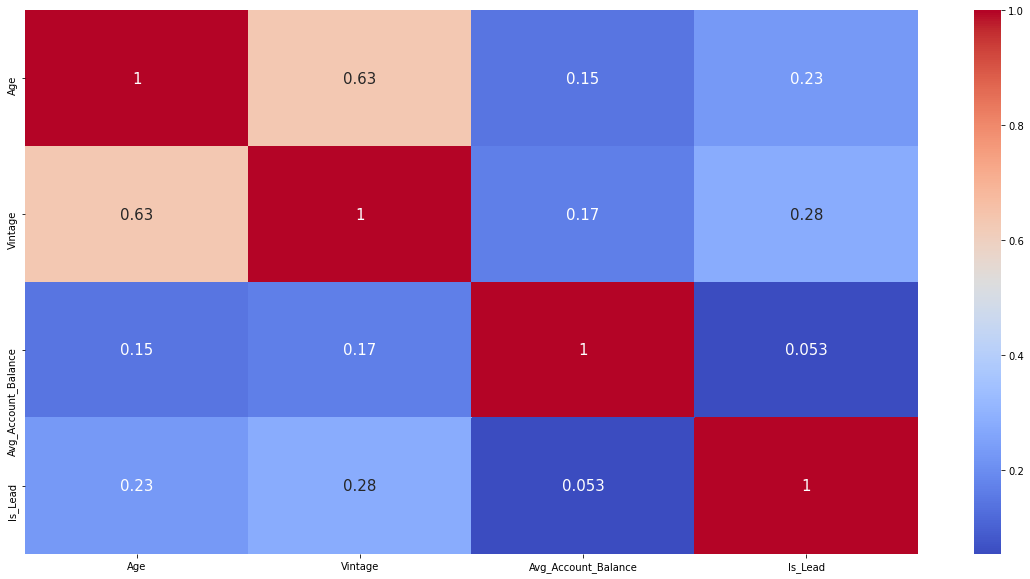

In [ ]:
cormat=df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,10))
sns.heatmap(abs(df[top_corr_features].corr()),cmap='coolwarm',annot=True,annot_kws={'size':15})

In [ ]:
categorical_features = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print("-----------------")

Gender :
Male      134197
Female    111528
Name: Gender, dtype: int64
-----------------
Region_Code :
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64
-----------------
Occupation :
Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
-----------------
Channel_Code :
X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
-----------------
Credit_Product :
No     144357
Yes     72043
Na

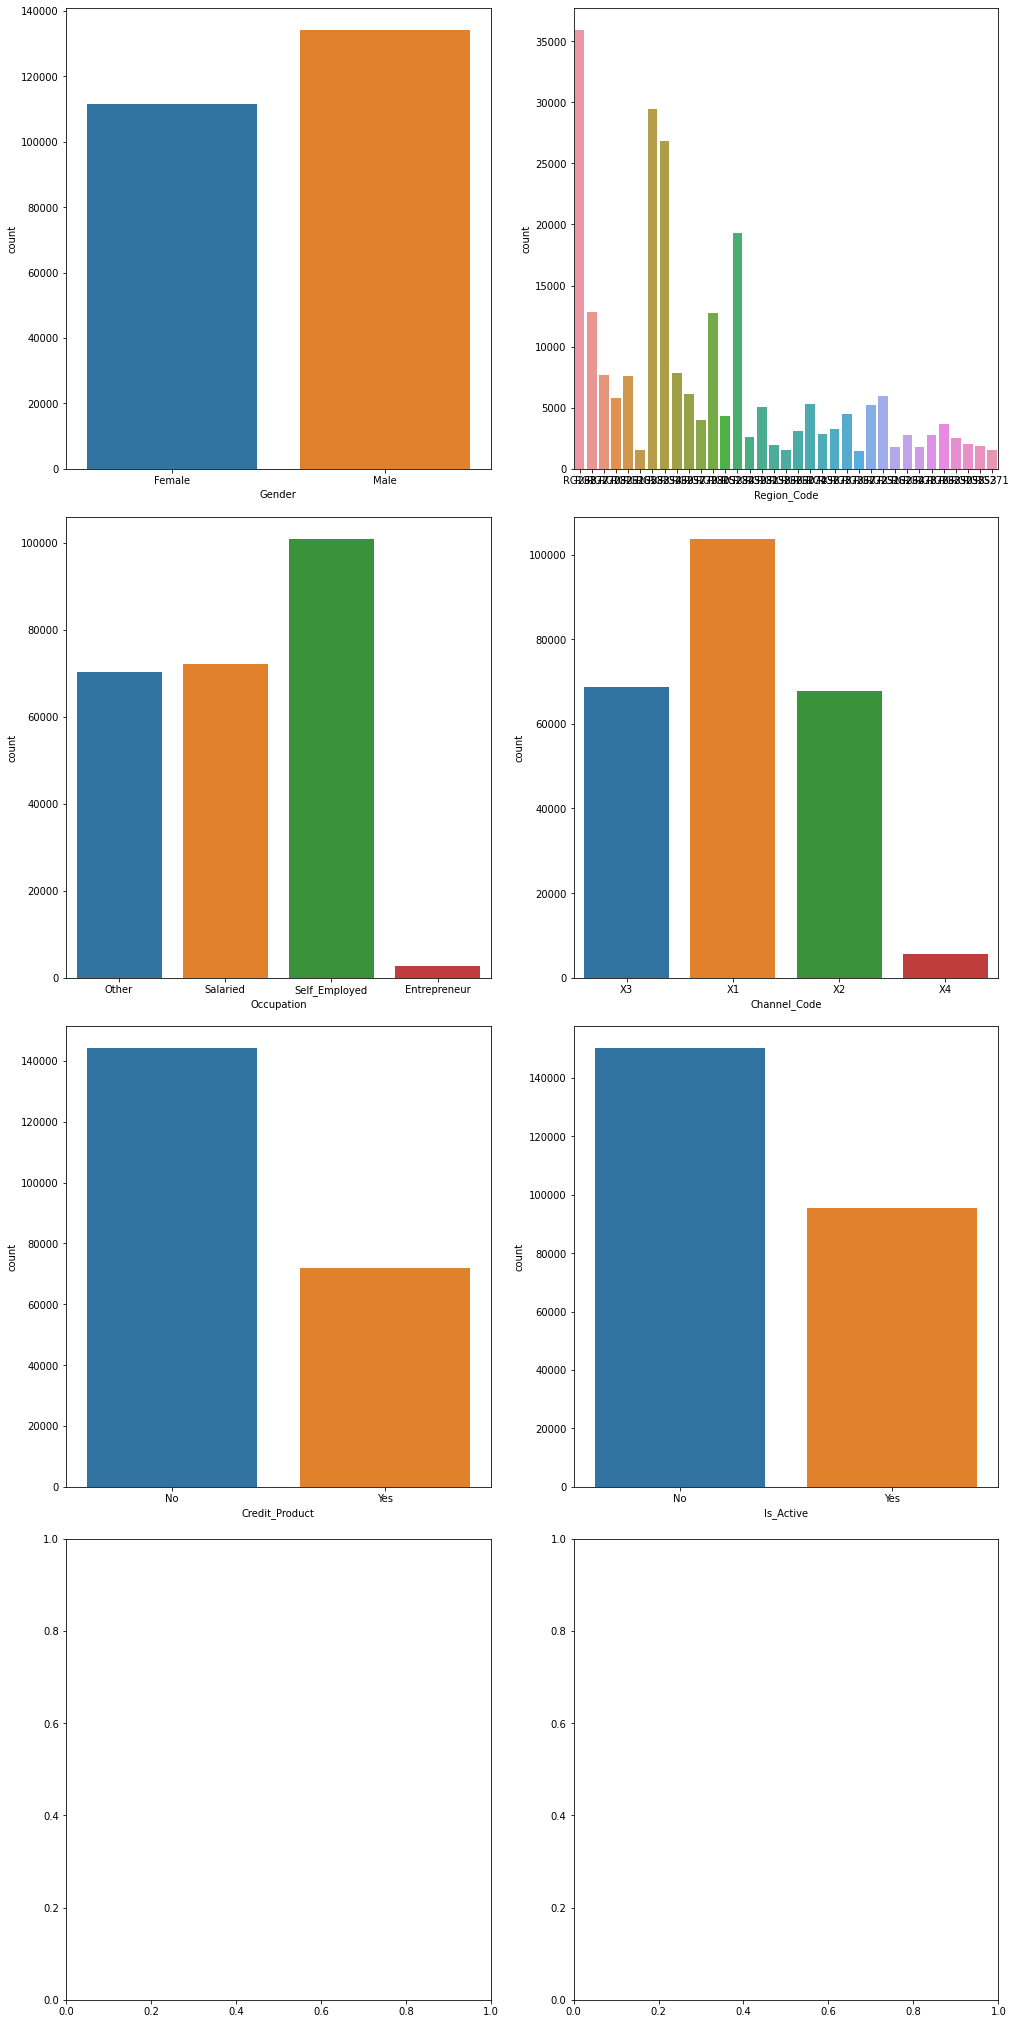

In [ ]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


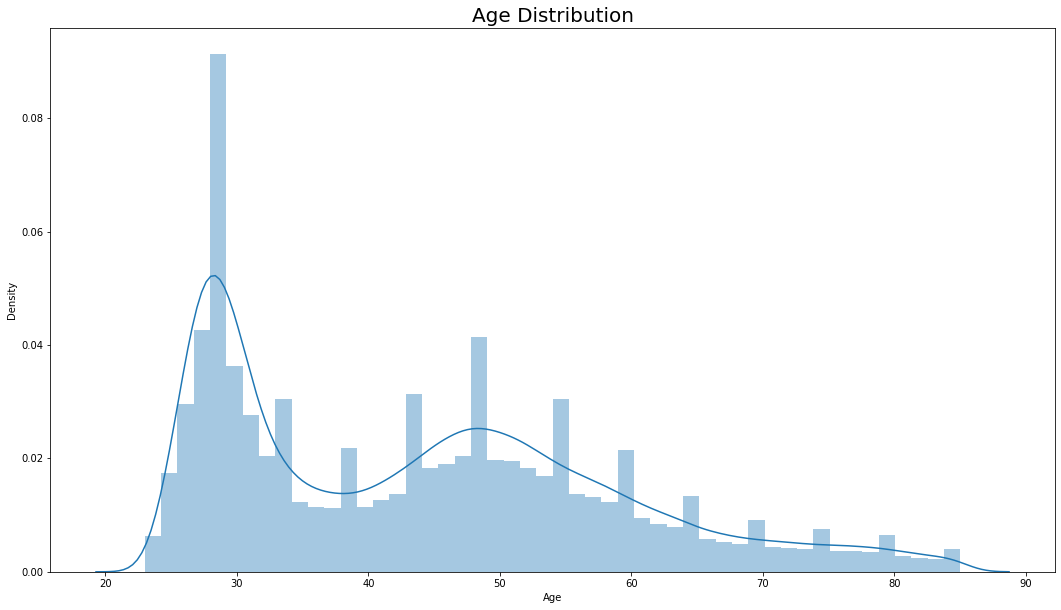

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


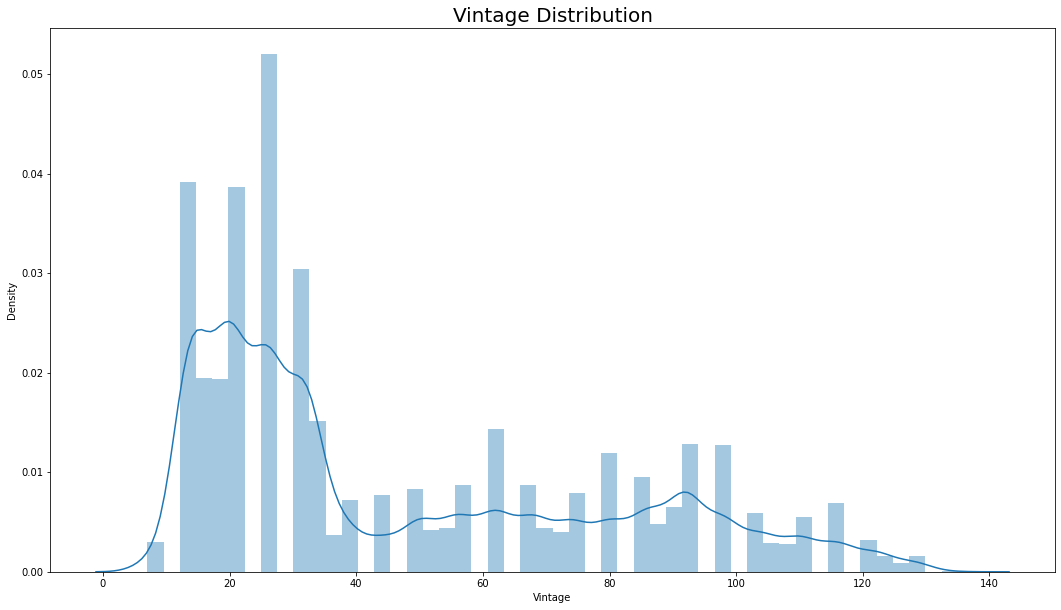

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


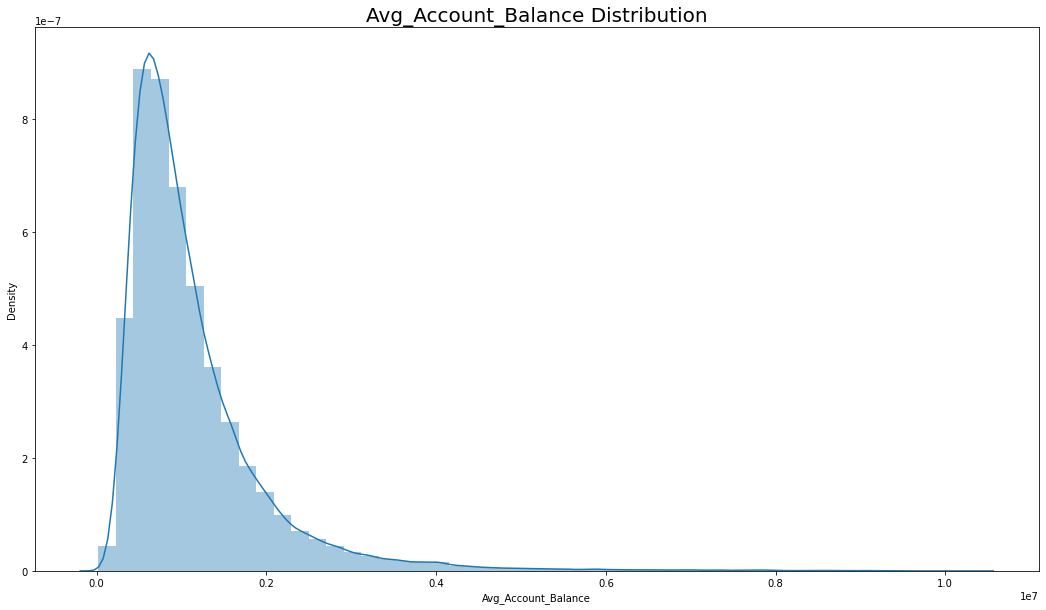

In [ ]:
numeric_features = ['Age', 'Vintage', 'Avg_Account_Balance']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


See that Target Variable is highly Imbalance

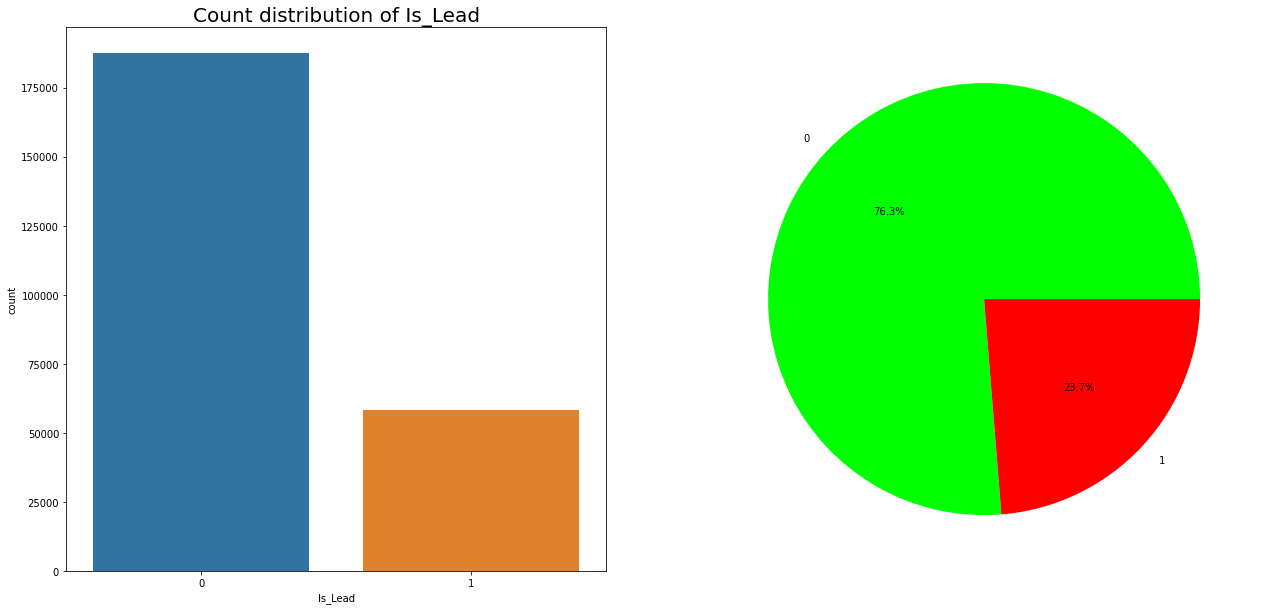

In [ ]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="Is_Lead", data=df)
plt.title("Count distribution of Is_Lead", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["Is_Lead"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

**Bivariate analysis**

In [ ]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = df.groupby("Gender", as_index=False).Is_Lead.sum()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]), <a list of 9 Text major ticklabel objects>)

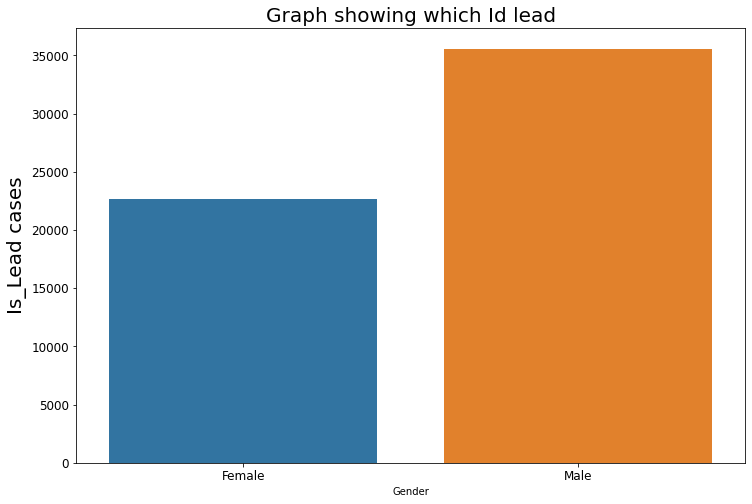

In [ ]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["Gender"], y=graph_2["Is_Lead"])
plt.title("Graph showing which Id lead", size=20)
plt.ylabel("Is_Lead cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

# **SAMPLING**

**Resampling imbalanced data which is our target variable in the dataset by oversampling positive cases**

In [ ]:
target1=df[df['Is_Lead']==1]
target0=df[df['Is_Lead']==0]

In [ ]:
from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [ ]:
target=pd.concat([target0,target1])

In [ ]:
target['Is_Lead'].value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

In [ ]:
df=target
np.shape(df)

(374874, 11)

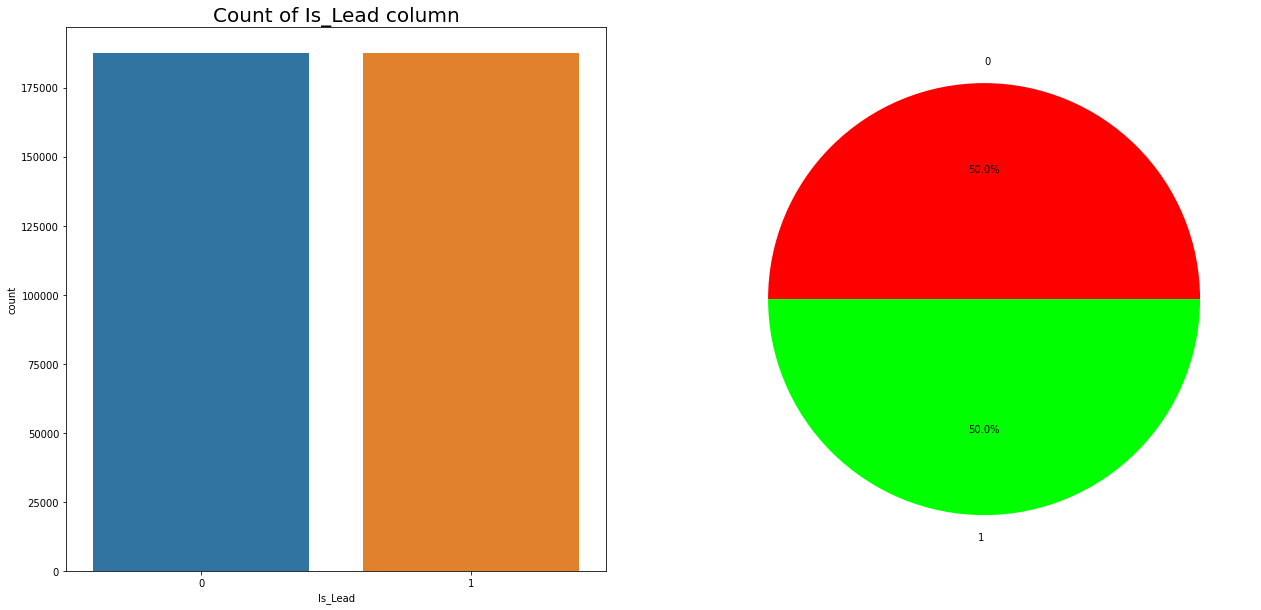

In [ ]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="Is_Lead", data=df)
plt.title("Count of Is_Lead column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["Is_Lead"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

Drop the ID column for no future use in prediction

In [ ]:
df.drop(columns='ID',inplace=True)

In [ ]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


**Encoding and HOT Encoding with the Object data type**

In [ ]:
df["Credit_Product"].fillna("No_Credit", inplace = True) 

In [ ]:
encoders_nums = {"Gender":{"Female":1,"Male":0},
                 "Is_Active":{"Yes":1,"No":0}}

df = df.replace(encoders_nums)

In [ ]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,No,1045696,0,0
1,1,30,RG277,Salaried,X1,32,No,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,No,1484315,1,0
3,0,34,RG270,Salaried,X1,19,No,470454,0,0
4,1,30,RG282,Salaried,X1,33,No,886787,0,0


In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns=["Region_Code", "Occupation","Channel_Code","Credit_Product"], prefix=["Region_Code", "Occupation","Channel_Code","Credit_Product"],drop_first=True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Vintage', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Region_Code_RG251', 'Region_Code_RG252',
       'Region_Code_RG253', 'Region_Code_RG254', 'Region_Code_RG255',
       'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258',
       'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261',
       'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264',
       'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267',
       'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG271', 'Region_Code_RG272', 'Region_Code_RG273',
       'Region_Code_RG274', 'Region_Code_RG275', 'Region_Code_RG276',
       'Region_Code_RG277', 'Region_Code_RG278', 'Region_Code_RG279',
       'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282',
       'Region_Code_RG283', 'Region_Code_RG284', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X2',
       'Channel_Code_X3

# **Model Training**

**Now the dataset is Balanced**

In [ ]:
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

In [ ]:
train_y = df['Is_Lead']
train_x = df.drop(['Is_Lead'], axis=1)

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/Almabetter DataScience/Job A thon/data/test_mSzZ8RL.csv")

In [ ]:
test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
ID_column = test_data['ID']

In [ ]:
test_data.drop(columns="ID",inplace=True)

In [ ]:
test_data["Credit_Product"].fillna("No_Credit", inplace = True) 

In [ ]:
encoders_nums = {"Gender":{"Female":1,"Male":0},
                 "Is_Active":{"Yes":1,"No":0}
                 }

test_data = test_data.replace(encoders_nums)

In [ ]:
# One hot encoding
test_data = pd.get_dummies(test_data, columns=["Region_Code", "Occupation","Channel_Code","Credit_Product"], prefix=["Region_Code", "Occupation","Channel_Code","Credit_Product"],drop_first=True)

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_data)

## * **Logistic Regressor**

In [ ]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(train_x)
lr_conf_matrix = confusion_matrix(train_y, lr_predict)
lr_acc_score = accuracy_score(train_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(train_y,lr_predict))

confussion matrix
[[153634  33803]
 [ 45267 142170]]


Accuracy of Logistic Regression: 78.90757961341677 

              precision    recall  f1-score   support

           0       0.77      0.82      0.80    187437
           1       0.81      0.76      0.78    187437

    accuracy                           0.79    374874
   macro avg       0.79      0.79      0.79    374874
weighted avg       0.79      0.79      0.79    374874



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y, lr_predict)

0.7890757961341678

**Linear Regression Test Data Predicton**

In [ ]:
lr_predict_test = lr.predict(test_x)

In [ ]:
df_new = pd.DataFrame(columns=["ID", "Is_Lead"])
df_new["ID"] = ID_column
df_new["Is_Lead"] = lr_predict_test

In [ ]:
df_new['Is_Lead'].value_counts()

0    72012
1    33300
Name: Is_Lead, dtype: int64

## * **Random Forest**

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(train_x)
rf_conf_matrix = confusion_matrix(train_y, rf_predicted)
rf_acc_score = accuracy_score(train_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(train_y,rf_predicted))

confussion matrix
[[159006  28431]
 [ 40100 147337]]


Accuracy of Random Forest: 81.71892422520634 

              precision    recall  f1-score   support

           0       0.80      0.85      0.82    187437
           1       0.84      0.79      0.81    187437

    accuracy                           0.82    374874
   macro avg       0.82      0.82      0.82    374874
weighted avg       0.82      0.82      0.82    374874



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y, rf_predicted)

0.8171892422520634

**Random Forest Test data prediction**

In [ ]:
rf_predicted_test = rf.predict(test_x)

In [ ]:
df_new = pd.DataFrame(columns=["ID", "Is_Lead"])
df_new["ID"] = ID_column
df_new["Is_Lead"] = rf_predicted_test

In [ ]:
df_new['Is_Lead'].value_counts()

0    73701
1    31611
Name: Is_Lead, dtype: int64

**Write the data Into the file which is goin for the submission**

In [ ]:
df_new.to_csv("/content/drive/MyDrive/Almabetter DataScience/Job A thon/data/Submission_demo.csv",index=False)

**Inference:**

* I used the Random forest algorithm which is working good for the training data set 
* I found the good auc_roc score 81% for the training data set.
* I also found the precision of approximate 82 and recall also approximate 82


**Try with some other parameters of the Random Forest**

In [ ]:
randomForestAlgo = RandomForestClassifier()
param = { 'bootstrap': [False],
          'max_depth': [100],
          'max_features': ['auto'],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'n_estimators': [400]}


grid = GridSearchCV(randomForestAlgo, param, refit = True, verbose = 3,n_jobs=-2) 
   

grid.fit(train_x, train_y) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.943, total= 6.5min
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.943, total= 6.3min
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed: 12.9min remaining:    0.0s


[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.940, total= 6.0min
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.940, total= 5.6min
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.942, total= 5.6min


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed: 30.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
param=grid.best_params_

In [ ]:
param

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
rf_predicted_train = grid.predict(train_x)
rf_best_conf_matrix = confusion_matrix(train_y, rf_predicted_train)
rf_best_acc_score = accuracy_score(train_y, rf_predicted_train)
print("confussion matrix")
print(rf_best_conf_matrix)
print("\n")
print("Accuracy of Random Forest best estimator:",rf_best_acc_score*100,'\n')
print(classification_report(train_y,rf_predicted_train))

confussion matrix
[[187435      2]
 [     0 187437]]


Accuracy of Random Forest best estimator: 99.99946648740644 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187437
           1       1.00      1.00      1.00    187437

    accuracy                           1.00    374874
   macro avg       1.00      1.00      1.00    374874
weighted avg       1.00      1.00      1.00    374874



In [ ]:
rf_best_predicted_test = grid.predict(test_x)

In [ ]:
df_new = pd.DataFrame(columns=["ID", "Is_Lead"])
df_new["ID"] = ID_column
df_new["Is_Lead"] = rf_best_predicted_test

In [ ]:
df_new['Is_Lead'].value_counts()

0    85673
1    19639
Name: Is_Lead, dtype: int64

In [ ]:
df_new.to_csv("/content/drive/MyDrive/Almabetter DataScience/Job A thon/data/Submission_demo.csv",index=False)

I used the parameters for the Random forest but it gives me good accuracy for the training data but less accuracy in the test validation.

**Inference:**

I used some of the algorithm but the Random forest gives me the good accuracy for the test data.

Thank you!